## Constructing euclidian rhythms from biotunings

Euclidean rhythms represent an even distribution of pulses within a specified number of steps. It is possible to convert frequency ratios into euclidian rhythms in that a ratio's numerator can be seen as the number of pulses and a ratio's denominator as the number of steps within which the pulses should be distributed. In this notebook we will see how to derive Euclidean rhythms from EEG signal by extracting spectal peaks and looking at their frequency ratios. Therefore, more consonant brain frequency ratios will lead to more aligned Euclidean polyrhythms. 

In [1]:
import numpy as np
from biotuner.biotuner_object import compute_biotuner, harmonic_tuning
import time
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Load dataset
data = np.load('../data/EEG_example.npy')

# Select a single time series 
# 20
data_ = data[25]
start = time.time()

# Initialize biotuner object
biotuning_harm_peaks = compute_biotuner(sf = 1000, peaks_function = 'harmonic_recurrence', precision = 0.5) 

# Extract spectral peaks
biotuning_harm_peaks.peaks_extraction(data_, min_freq = 5, max_freq = 20, min_harms = 4, harm_limit = 128)
#print(biotuning_harm_peaks.all_harmonics)

stop = time.time()
print(stop-start)

# Print the extracted peaks
print('Spectral peaks :', biotuning_harm_peaks.peaks)

# Create harmonic tuning
harm_tuning = harmonic_tuning(biotuning_harm_peaks.all_harmonics)
print(harm_tuning)

0.002963542938232422
Spectral peaks : [ 7.  17.   9.5 14.5]
[np.float64(1.0625), np.float64(1.125), np.float64(1.1875), np.float64(1.21875), np.float64(1.25), np.float64(1.28125), np.float64(1.375), np.float64(1.40625), np.float64(1.5), np.float64(1.5625), np.float64(1.625), np.float64(1.75), np.float64(1.8125), np.float64(1.875), np.float64(1.9375), np.float64(2.0)]


### Deriving euclidian rhythms from a series of ratios

When mode = 'normal', the ratios are inverted and the numerator is taken as the number of pulses and the denominator as the number of steps (e.g. 3/2 -> 2pulses/3steps).

When mode = 'full', the ratios are inverted. The number of steps corresponds to num*denom and the numbers of pulses correspond to both the initial numerator and denominator (e.g. 3/2 -> 3pulses/6steps and 2pulses/6steps)

In [2]:
from biotuner.rhythm_construction import scale2euclid, interval_vector, euclid_string_to_referent, interval_vec_to_string
from biotuner.biotuner_utils import scale2frac
from biotuner.dictionaries import dict_rhythms

# Convert the tuning from ratios to fractions
harm_tuning_frac, _, _ = scale2frac(harm_tuning[3:10])
print('Tuning :', harm_tuning_frac)

# Derive euclidian rhythms from the harmonic tuning
euclid_patterns = scale2euclid(harm_tuning[3:10], max_denom = 16, mode = 'normal')
print('Euclid patterns :', euclid_patterns)

# Compute interval vectors
interval_vectors = [interval_vector(x) for x in euclid_patterns]
print('Interval vectors :', interval_vectors)

# Compare rhythms to referents
strings = interval_vec_to_string(interval_vectors)
euclid_referent = euclid_string_to_referent(strings, dict_rhythms)
euclid_referent

Tuning : [39/32, 5/4, 41/32, 11/8, 45/32, 3/2, 25/16]
Euclid patterns : [[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 0], [1, 1, 1, 0, 1, 1, 1, 0, 1], [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1], [1, 1, 0], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]]
Interval vectors : [[1, 1, 1, 2, 1, 1, 1, 2, 1], [1, 1, 1, 2], [1, 1, 2, 1, 1, 2, 1], [1, 2, 1, 1, 2, 1, 1, 2], [1, 2, 1, 2, 1], [1, 2], [2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1]]


['None',
 'None',
 'It is the Bazaragana rhythmic pattern of Greece.',
 'None',
 'It is the Nawakhat pattern, a popular Arabic rhythm. In Nubia it is called the Al Noht rhythm.',
 'A common Afro-Cuban drum pattern when started on the second onset as in [101]. For example, it is the conga rhythm of the (6/8)-time Swing Tumbao. It is common in Latin American music, as for example in the Cueca, and the coros de clave. It is common in Arabic music, as for example in the Al Taer rhythm of Nubia. It is also a rhythmic pattern of the Drum Dance of the Slavey Indians of Northern Canada',
 'None']

### Finding consonant euclidian rhythms from a set of frequency ratios
'consonant_euclid' function derives euclidian rhythm from a set of consonant intervals. 

First, a set of denominators is defined by finding the common denominator of each pair of ratios (e.g. 3/5 and 4/7 give 5*7=35). 

The consonance is computed on each pairs of denominators to find harmonic subdivisions. Only the euclidian rhythms from consonant denominators (steps) are returned.

The extracted rhythms are compared to a dictionary containing a large database of known rhythms and their origin and description.

The 

In [3]:
from biotuner.rhythm_construction import consonant_euclid, interval_vec_to_string

# Derive consonant euclidian rhythms from the harmonic tuning
euclid_final, cons = consonant_euclid(harm_tuning, n_steps_down = 2, limit_denom = 8, 
                                      limit_cons = 0.5, limit_denom_final = 8)
print('Euclid patterns :', euclid_final)

# Compare rhythms to referents
interval_vectors = [interval_vector(x) for x in euclid_final]
strings = interval_vec_to_string(interval_vectors)
euclid_referent = euclid_string_to_referent(strings, dict_rhythms)
euclid_referent

Euclid patterns : [[1, 0], [1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 1, 0], [1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0], [1, 0, 1, 1, 0, 1, 1, 0], [1, 1, 0], [1, 1, 0, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 0]]


c:\Users\Antoine\anaconda3\envs\biotuner\Lib\fractions.py:712: RuntimeWarning: overflow encountered in scalar multiply
  self._denominator * other.numerator)
c:\Users\Antoine\anaconda3\envs\biotuner\Lib\fractions.py:711: RuntimeWarning: overflow encountered in scalar multiply
  return op(self._numerator * other.denominator,


['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 "It is none other than one of the most famous rythms on the planet. In Cuba it goes by the name of the tresillo and in the USA is often called the Habanera rhythm used in hundreds of rockabilly songs during the 1950s. It can often be heard in early rock-and-roll hits in the left-hand patterns of the piano, or played on the string bass or saxophone. A good example is the bass rhythm in Elvis Presley's Hound Dog. The tresillo pattern is also found widely in West African traditional music. For example, it is played on the atoke bell in the Sohu, an Ewe dance from Ghana. The tresillo can also be recognized as the first bar of the ubiquitous two-bar clave Son given by [1001001000101000].",
 "A rhythm found in Greece, Namibia, Rwanda and Central Africa. It is also a 13th century Persian rhythm called Khafif-e-ramal, as well as the rhythm of the dance Makedonka from the FYROM. Tchaikovsky used it as the metric pattern in the second moveme

### Visualizing euclidean biorhythms

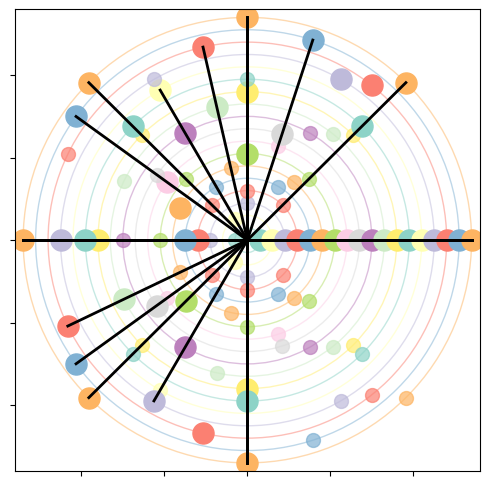

In [5]:
# variability of scales of integration for optimal brain homeostatic growth
from biotuner.vizs import visualize_rhythms

euclid_rhythms = []
for i in range(len(euclid_final)):
    pulse = euclid_final[i].count(1)
    steps = len(euclid_final[i])
    euclid_rhythms.append((pulse, steps))
visualize_rhythms(euclid_rhythms)
